In [4]:
#echo 1 | sudo tee /proc/sys/vm/overcommit_memory
#export LD_LIBRARY_PATH=${LD_LIBRARY_PATH}:/usr/local/cuda/lib64

import numpy as np

Path = "home/felix-ML/RBG32Bit"

#Load Training, validation and test images
train_images = np.load(Path + "/train_images.npy")
val_images = np.load(Path + "/val_images.npy")
test_images = np.load(Path + "/test_images.npy")

#Load Training, validation and test labels
train_lab = np.load(Path + "/train_lab.npy")
val_lab = np.load(Path + "/val_lab.npy")
test_lab = np.load(Path + "/test_lab.npy")



FileNotFoundError: [Errno 2] No such file or directory: 'home/felix-ML/RBG32Bit/train_images.npy'

In [3]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image_dataset_from_directory
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2
#from keras.models import load_model
import os
import matplotlib.pyplot as plt
import pickle

os.environ["TF_CPP_MIN_LOG_LEVEL"]="3" 

PixelDimension = 3


model = models.Sequential()
model.add(layers.SeparableConv2D(128, (3, 3), activation='relu', input_shape=(64, 64, PixelDimension)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SeparableConv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SeparableConv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, activation='relu', kernel_regularizer = l2(0.0001)))
model.add(layers.Dense(10, activation='softmax', kernel_regularizer = l2(0.0001)))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate = 0.0005), metrics=['acc'])

#model.summary()


EarlyStop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
Checkpoint = ModelCheckpoint("3DCovBest.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min', period=1)

#model = models.load_model('F:\\training3000\\pngs_thicknesses_model_L2.h5')
#model.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=['acc'])


history = model.fit(train_images, train_lab, epochs=100, batch_size = 64, validation_data = (val_images, val_lab), shuffle = True, callbacks=[EarlyStop, Checkpoint])

model.save('3DCovLast.h5')

test_loss, test_acc = model.evaluate(test_images, test_lab)

with open('3DCovPICKLE', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/100
814/814 [==============================] - ETA: 0s - loss: 1.7969 - acc: 0.3074
Epoch 00001: val_loss improved from inf to 1.71758, saving model to 3DCovBest.hdf5
814/814 [==============================] - 28s 34ms/step - loss: 1.7969 - acc: 0.3074 - val_loss: 1.7176 - val_acc: 0.3442
Epoch 2/100
813/814 [============================>.] - ETA: 0s - loss: 1.6346 - acc: 0.3652
Epoch 00002: val_loss improved from 1.71758 to 1.62531, saving model to 3DCovBest.hdf5
814/814 [==============================] - 27s 33ms/step - loss: 1.6345 - acc: 0.3652 - val_loss: 1.6253 - val_acc: 0.3740
Epoch 3/100
813/814 [============================>.] - ETA: 0s - loss: 1.5618 - acc: 0.3984
Epoch 00003: val_loss improved from 1.62531 to 1.53718, saving model to 3DCovBest.hdf5
814/814 [==============================] - 26s 33ms/step - loss: 1.5618 - acc: 0.3984 - val_loss: 1.5372 - val_acc: 0.4132
Epoch 4/100
813/814 [============================>.] - ETA: 0s - loss: 1.4932 - acc: 0.4306
Epoch 

Epoch 29/100
813/814 [============================>.] - ETA: 0s - loss: 0.5196 - acc: 0.9023
Epoch 00029: val_loss did not improve from 1.39071
814/814 [==============================] - 26s 32ms/step - loss: 0.5195 - acc: 0.9023 - val_loss: 2.0173 - val_acc: 0.6233
Epoch 30/100
813/814 [============================>.] - ETA: 0s - loss: 0.5134 - acc: 0.9050
Epoch 00030: val_loss did not improve from 1.39071
814/814 [==============================] - 26s 32ms/step - loss: 0.5134 - acc: 0.9050 - val_loss: 2.1365 - val_acc: 0.6172
Epoch 31/100
813/814 [============================>.] - ETA: 0s - loss: 0.5053 - acc: 0.9076
Epoch 00031: val_loss did not improve from 1.39071
814/814 [==============================] - 26s 32ms/step - loss: 0.5052 - acc: 0.9076 - val_loss: 2.1545 - val_acc: 0.6296
Epoch 32/100
813/814 [============================>.] - ETA: 0s - loss: 0.5022 - acc: 0.9105
Epoch 00032: val_loss did not improve from 1.39071
814/814 [==============================] - 26s 32ms/ste

NameError: name 'pickle' is not defined

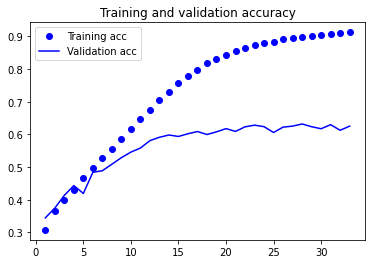

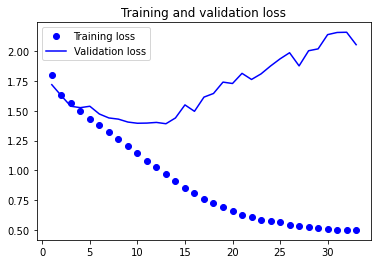